## Import Datasets From NLTK

In [1]:
import nltk

In [63]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [12]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

A brief overviews on the dataset, such as content and layout. 

In [13]:
print(len(messages))

5574


In [17]:
messages[1]
#  \t means it's tab seperetion 

'ham\tOk lar... Joking wif u oni...'

In [16]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [18]:
messages[0]


'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

Import dataset and read by Pandas for futher analysis. 

In [19]:
import pandas as pd 

In [23]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [24]:
messages.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [26]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [28]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [29]:
messages['length'] = messages['message'].apply(len)

In [31]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

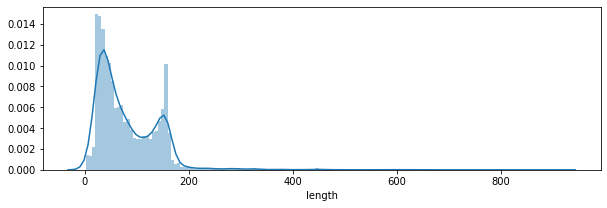

In [41]:
plt.figure(figsize=(10,3))
sns.distplot(messages['length'],bins=150)

We noticed there are two major groups for text sizes, as well as few outsiders. 

In [42]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [48]:
messages[messages['length']>=700]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790


In [53]:
messages[messages['length']==910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f2dbd10>,
      dtype=object)

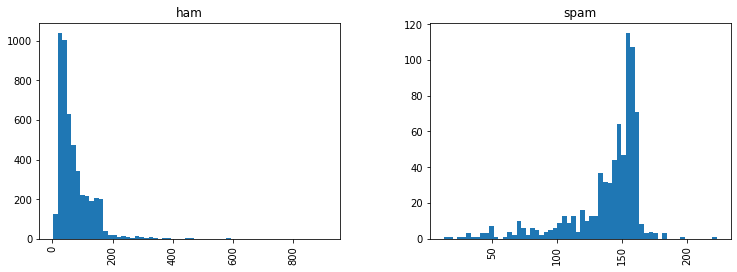

In [54]:
messages.hist(column = 'length',by='label',bins=60,figsize=(12,4))
# spam intend to have larger word counts

 ## Bag of words

In [64]:
from nltk.corpus import stopwords

In [65]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [74]:
def text_process(mess):
    '''
    1. remove puncations
    2. remove stopwords
    3. return list of clean text words
    '''
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc=''.join(no_punc)
    no_stopwords = [ word for word in no_punc.split() if word.lower not in stopwords.words('english')]
    return no_stopwords

In [76]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [79]:
messages['message'].head().apply(text_process)
# remove all non-useful words / punctuation and return the rest in list 

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
Name: message, dtype: object

## Words Transformation

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [88]:
print(len(bow_transformer.vocabulary_))

11747


In [89]:
mess4 = messages['message'][3]

In [90]:
mess4

'U dun say so early hor... U c already then say...'

In [91]:
bow4 = bow_transformer.transform([mess4])

In [92]:
print(bow4)

  (0, 4221)	2
  (0, 4828)	1
  (0, 5476)	1
  (0, 6427)	1
  (0, 6447)	1
  (0, 7427)	1
  (0, 9832)	2
  (0, 10174)	1
  (0, 10703)	1


In [93]:
print(bow4.shape)

(1, 11747)


In [94]:
# comfirm which words appear mutiple times
bow_transformer.get_feature_names()[4221]

'U'

In [95]:
bow_transformer.get_feature_names()[9832]

'say'

In [96]:
messages_bow = bow_transformer.transform(messages['message'])

In [97]:
print('Shape of Sparese Matris',messages_bow.shape)

Shape of Sparese Matris (5572, 11747)


In [98]:
# None-zero
messages_bow.nnz

79463

## TF-IDF

In [99]:
from sklearn.feature_extraction.text import TfidfTransformer

In [100]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [101]:
tfidf4 = tfidf_transformer.transform(bow4)

In [102]:
print(tfidf4)

  (0, 10703)	0.2214828525636521
  (0, 10174)	0.19345051326676527
  (0, 9832)	0.5147493130794172
  (0, 7427)	0.41952836023632145
  (0, 6447)	0.3046289560740644
  (0, 6427)	0.28629349827015765
  (0, 5476)	0.2841540501592932
  (0, 4828)	0.25442769469153637
  (0, 4221)	0.3902711884065556


In [105]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [107]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [108]:
from sklearn.naive_bayes import MultinomialNB

In [109]:
spam_detect_mode = MultinomialNB().fit(messages_tfidf,messages['label'])

In [111]:
spam_detect_mode.predict(tfidf4)

array(['ham'], dtype='<U4')

In [121]:
messages.iloc[3]

label                                                    ham
message    U dun say so early hor... U c already then say...
length                                                    49
Name: 3, dtype: object

In [123]:
all_pred = spam_detect_mode.predict(messages_tfidf)

In [124]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

The issue here is there is no test set. Let's create a test set
   ## Split Data and Test

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
mes_train, mes_test, label_train, label_test = train_test_split(messages['message'],messages['label'],test_size = 0.3)

To easy the process for cleaning bag of words and TF-IDF. SKlearn has an pipeline features to easyly go through the process.

In [128]:
from sklearn.pipeline import Pipeline

In [129]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tf-idf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [130]:
pipeline.fit(mes_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1a1f9a0a70>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tf-idf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [134]:
predictions = pipeline.predict(mes_test)

## Accuracy of the result

In [132]:
from sklearn.metrics import classification_report,confusion_matrix

In [135]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1438
        spam       1.00      0.62      0.77       234

    accuracy                           0.95      1672
   macro avg       0.97      0.81      0.87      1672
weighted avg       0.95      0.95      0.94      1672



In [136]:
print(confusion_matrix(label_test,predictions))

[[1438    0]
 [  88  146]]
